<a href="https://colab.research.google.com/github/lubianat/transparencia_na_pandemia/blob/master/tiago_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploração dos dados piloto dos Diários Oficiais 

Os dados foram fornecidos em diversas pastas, com categorias distintas. Os arquivos estão presentes em formato .txt, com diversos arquivos por pasta. 


## Descrição dos dados

A descrição dos dados, nos fornecida pelo Mario Sérgio, nosso ponto de contato da Open Knowledge Foundation, é a seguinte:


- Foram coletados arquivos em PDF de 306 municípios brasileiros, listados [aqui](https://github.com/okfn-brasil/querido-diario/tree/main/processing/data_collection/gazette/spiders).

- O intervalo de publicação dos diários é do dia 01 de fevereiro de 2020 até o dia 15 de junho de 2020.

- Os arquivos em PDF foram convertidos para arquivos texto.

- Aplicamos buscas por palavras-chave, utilizando um MVP de busca.

As palavras-chaves são:
- 'emergencial',
- '"estado de Emergência de Saúde Pública"',
- '"Dispensa de licitação"',
- '"Equipamentos de Proteção Individual"',
- 'EPI',
- '"ventiladores pulmonares"',
- '"ventilador pulmonar"',
- 'Demanda Emergencial Covid-19',
- '"teste rápido"',
- 'RT-PCR',
- '"Hospital de Campanha"'

Basicamente são os arquivos dos diários completos, que foram convertidos em texto e que apresentam algumas dessas palavras-chaves listadas.


## O que são esses dados? 

- Quantos arquivos por busca? 
- Qual a distribuição de tamanho desses arquivos? 
  - Tamanho em bytes
  - Tamanho em # palavras

- Conseguimos saber de quais municípios são os dados? 




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import pprint 
import os

dir = '/content/drive/Shared drives/Transparência na Pandemia/8-Transparência em tempos de pandemia/Buscas de palavras chaves'

In [ ]:
keywords = os.listdir(dir)

files_per_keyword = {}


for index, keyword in enumerate(keywords):

  dir_of_search_results = dir + "/" + keyword
  files_per_keyword[keyword] =  len(os.listdir(dir_of_search_results))

pprint.pprint(files_per_keyword)

{'Demanda Emergencial Covid-19': 228,
 'EPI': 222,
 'RT-PCR': 26,
 '_Dispensa de licitação_': 800,
 '_Equipamentos de Proteção Individual_': 207,
 '_Hospital de Campanha_': 52,
 '_estado de Emergência de Saúde Pública_': 36,
 '_teste rápido_': 63,
 '_ventilador pulmonar_': 18,
 '_ventiladores pulmonares_': 10,
 'emergencial': 440}


O número de arquivos encontrados varia bastante dependendo da busca. 
É bom termos isso em mente na hora de olhar os dados. 

É possível que os dados da categoria  '_Dispensa de licitação_' refiram-se a um número muito maior de municípios que os da categoria  '_ventilador pulmonar_'. 

## Distribuição dos arquivos por categoria

Vamos olhar estatísticas descritivas dos arquivos nos diretórios. Por referência, parte das análises foi selecionada após leitura [deste texto sobre análise de sistemas de arquivos](https://janakiev.com/blog/python-filesystem-analysis/). 

In [ ]:
import folderstats
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
sns.set(color_codes=True)


ModuleNotFoundError: ignored

In [ ]:
keyword = '_ventiladores pulmonares_'

dir_of_search_results = dir + "/" + keyword
df = folderstats.folderstats(dir_of_search_results)

df.head(3)

,id,path,name,extension,size,atime,mtime,ctime,folder,num_files,depth,parent,uid
0,2,/content/drive/Shared drives/Transparência na...,262,txt,168344,1970-01-01,2020-09-01 21:03:49,2020-09-03 01:23:58,False,NaN,0,1,0
1,3,/content/drive/Shared drives/Transparência na...,1687,txt,642133,1970-01-01,2020-09-01 21:03:50,2020-09-03 01:24:12,False,NaN,0,1,0
2,4,/content/drive/Shared drives/Transparência na...,1755,txt,179168,1970-01-01,2020-09-01 21:03:50,2020-09-03 01:24:06,False,NaN,0,1,0


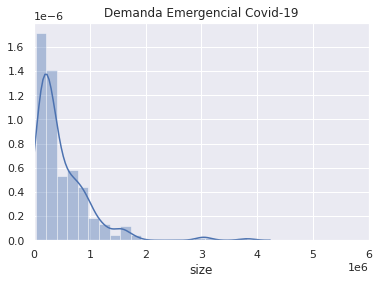

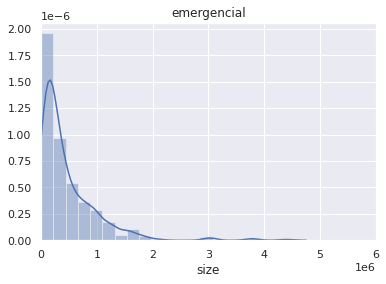

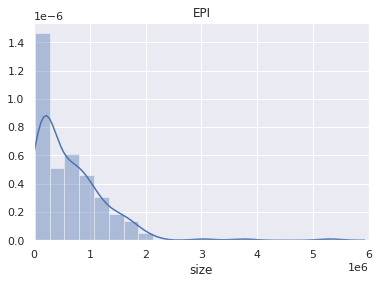

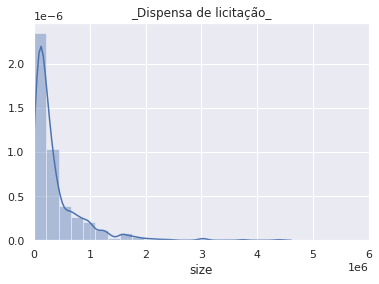

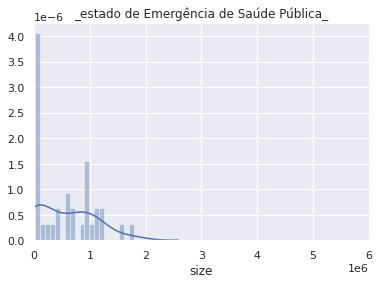

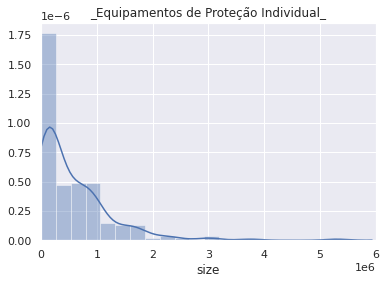

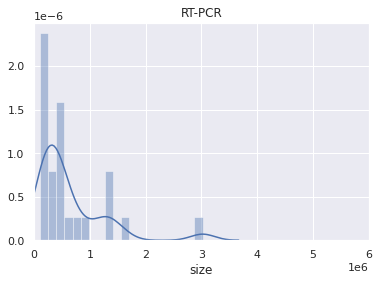

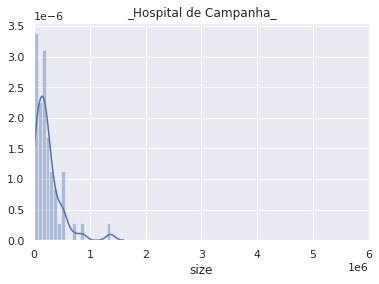

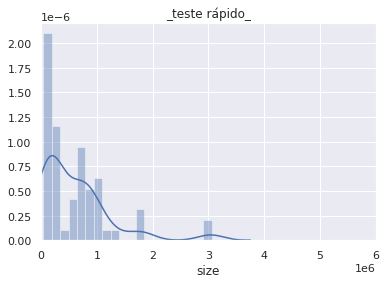

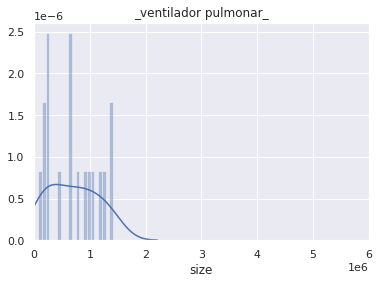

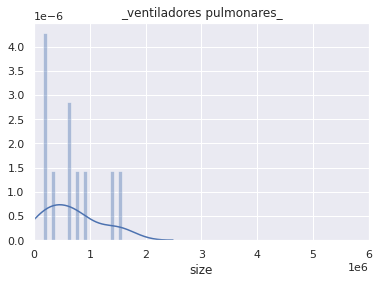

In [ ]:
for index, keyword in enumerate(keywords):

  dir_of_search_results = dir + "/" + keyword
  df = folderstats.folderstats(dir_of_search_results)
  df = df.query("extension == 'txt'")

  plt.figure(index)

  ax = sns.distplot(df["size"], bins=20, label=keyword)
  ax.set_title(keyword)
  plt.xlim(0, 6000000)